# Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from mlxtend.classifier import StackingCVClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import os
from sklearn.metrics import (
    classification_report, confusion_matrix,
    accuracy_score, precision_score, recall_score, f1_score
)

## Load data

In [74]:
data = pd.read_csv('../data/clean_heart_data.csv' , sep=';')
data.head()

,ca,age,sex,cp,trestbps,chol,fbs,restecg,thalach,oldpeak,num
0,0.0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,2.3,0
1,2.5,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.5,1
2,2.0,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,2.6,1
3,0.0,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,3.5,0
4,0.0,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,1.4,0


In [75]:
data.columns

Index(['ca', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'oldpeak', 'num'],
      dtype='object')

## Split train and test


In [76]:
#Split nos données
y=data['num'].copy()
X=data.drop(['num'],axis=1).copy()


## Decompose data in training and test sets

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42,shuffle=False)
# enregistrer le X_test
X_test.to_csv('../data/X_test.csv', index=False)
# enregistrer le y_test
y_test.to_csv('../data/y_test.csv', index=False)

## data shape

In [78]:
print(f"Nombre d'observations dans le jeu d'entraînement : {X_train.shape[0]}")
print(f"Nombre d'observations dans le jeu de test : {X_test.shape[0]}")

Nombre d'observations dans le jeu d'entraînement : 242
Nombre d'observations dans le jeu de test : 61


#### Nous pouvons continuer car notre jeu de donnée ne presente pas de soucis pour la constitution entre train et test en termes de desequilibre entre les classes.

In [79]:
X_train.head()

,ca,age,sex,cp,trestbps,chol,fbs,restecg,thalach,oldpeak
0,0.0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,2.3
1,2.5,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.5
2,2.0,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,2.6
3,0.0,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,3.5
4,0.0,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,1.4


### Modelisation


Ici nous testerons selon différents algorithme le modèle qui prédit au mieux nos classes

1. Logistic Regression
2. K-Nearest Neighbour
3. Random Forest Classifier
4. Extreme Gradient Boost (XGBoost)
5. Naive Bayes
6. Decision Tree
7. Support Vector Machine

### 1. **Logistic Regression**

In [80]:
pipeline_logreg = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(multi_class='auto', solver='lbfgs', max_iter=1000, random_state=42))
])
pipeline_logreg

,steps,"[('scaler', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


In [81]:
import joblib
pipeline_logreg.fit(X_train, y_train)
joblib.dump(pipeline_logreg, '../Pipeline/pipeline_logreg.pkl')


c:\Users\user\OneDrive\Desktop\ENSAE\Semestre 2\IML2\Projet\Machine-Learning\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


['../Pipeline/pipeline_logreg.pkl']

In [82]:
y_pred_logreg = pipeline_logreg.predict(X_test)

### Evaluate models

In [83]:
report_dict = classification_report(y_test, y_pred_logreg, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
report_df.style.background_gradient(cmap='Blues').format("{:.2f}")

,precision,recall,f1-score,support
0,0.70,0.90,0.79,29.00
1,0.88,0.66,0.75,32.00
accuracy,0.77,0.77,0.77,0.77
macro avg,0.79,0.78,0.77,61.00
weighted avg,0.79,0.77,0.77,61.00


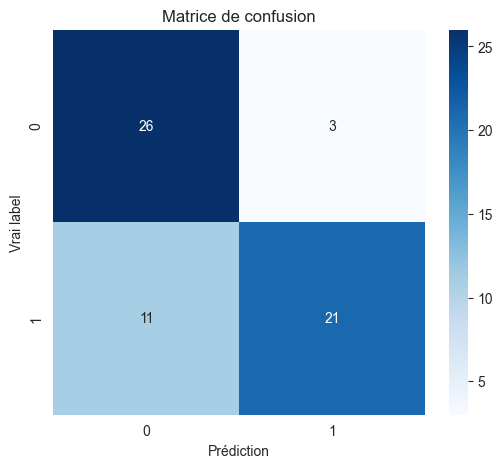

In [84]:
cm = confusion_matrix(y_test, y_pred_logreg)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Prédiction")
plt.ylabel("Vrai label")
plt.title("Matrice de confusion")
plt.show()


Accuracy globale: 0.770


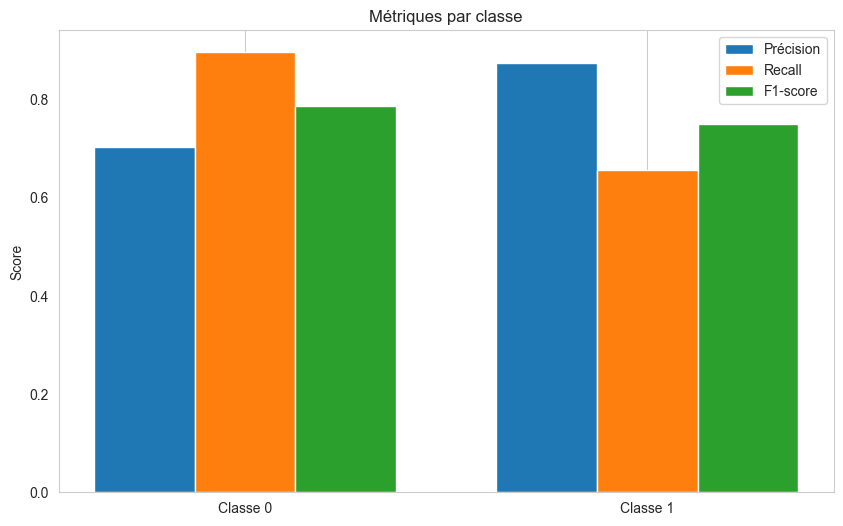

In [85]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
# Calcul des métriques par classe
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred_logreg)

# Accuracy globale
accuracy = accuracy_score(y_test, y_pred_logreg)

print(f"Accuracy globale: {accuracy:.3f}")

# Affichage sous forme de graphique
labels = [f'Classe {i}' for i in range(len(precision))]

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width, precision, width, label='Précision')
ax.bar(x, recall, width, label='Recall')
ax.bar(x + width, f1, width, label='F1-score')

ax.set_ylabel('Score')
ax.set_title('Métriques par classe')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(axis='y')

plt.show()

**Le modèle atteint une accuracy de 80.3%, mais les performances varient fortement selon les classes.**

### Optimisation des hyperparamètres

c:\Users\user\OneDrive\Desktop\ENSAE\Semestre 2\IML2\Projet\Machine-Learning\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1254: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\user\OneDrive\Desktop\ENSAE\Semestre 2\IML2\Projet\Machine-Learning\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1254: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\user\OneDrive\Desktop\ENSAE\Semestre 2\IML2\Projet\Machine-Learning\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1254: FutureWarning: 'multi_c

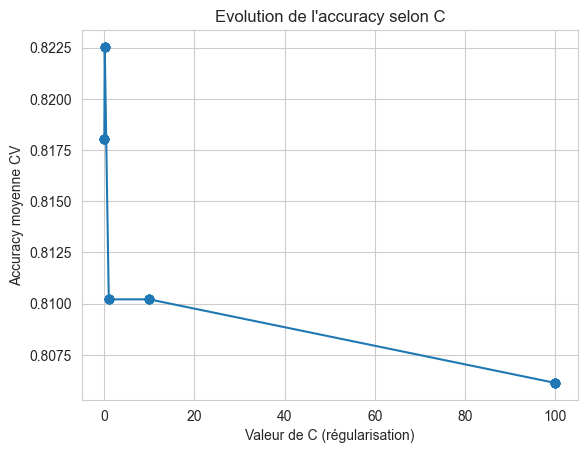

In [86]:
from sklearn.model_selection import GridSearchCV
# Grille d'hyperparamètres à tester pour la régression logistique
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],  # régularisation
    'classifier__solver': ['lbfgs', 'saga'],
    'classifier__max_iter': [100, 200, 500]
}

# Pipeline logistic regression (avec preprocessing déjà défini)
pipeline_logreg = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(multi_class='multinomial', random_state=42))
])

# GridSearchCV
grid_search = GridSearchCV(pipeline_logreg, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)
results = grid_search.cv_results_

# Extraire et tracer l'évolution de la métrique accuracy selon C
mean_test_scores = results['mean_test_score']
params_C = results['param_classifier__C']

plt.plot(params_C, mean_test_scores, marker='o')
plt.xlabel('Valeur de C (régularisation)')
plt.ylabel('Accuracy moyenne CV')
plt.title("Evolution de l'accuracy selon C")
plt.grid(True)
plt.show()

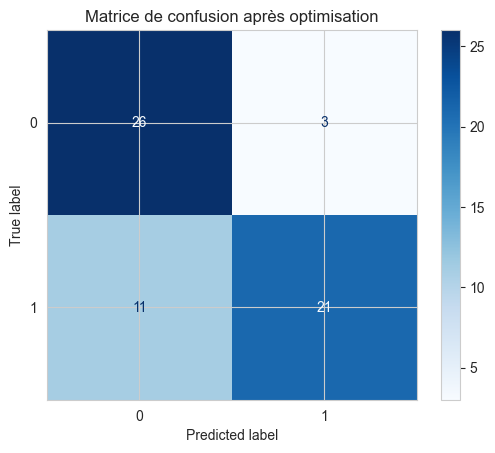

In [87]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

cm_best = confusion_matrix(y_test, y_pred_best)
disp_best = ConfusionMatrixDisplay(confusion_matrix=cm_best)
disp_best.plot(cmap='Blues')
plt.title("Matrice de confusion après optimisation")
plt.show()


In [88]:
# Générer le rapport au format dict
report_dict = classification_report(y_test, y_pred_logreg, output_dict=True)

# Convertir en DataFrame pour un affichage tabulaire
df_report = pd.DataFrame(report_dict).transpose()
df_report

,precision,recall,f1-score,support
0,0.702703,0.896552,0.787879,29.000000
1,0.875000,0.656250,0.750000,32.000000
accuracy,0.770492,0.770492,0.770492,0.770492
macro avg,0.788851,0.776401,0.768939,61.000000
weighted avg,0.793088,0.770492,0.768008,61.000000


Après avoir optimisé les hyperparamètres, le modèle de régression logistique a montré une plus performance qu'avant optimisation.

### **K-Nearest Neighbour**

In [89]:
from sklearn.neighbors import KNeighborsClassifier
pipeline_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier())
])

pipeline_knn

,steps,"[('scaler', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30


In [90]:
pipeline_knn.fit(X_train, y_train)
joblib.dump(pipeline_knn, '../Pipeline/pipeline_knn.pkl')


['../Pipeline/pipeline_knn.pkl']

In [91]:
y_pred_knn = pipeline_knn.predict(X_test)

In [92]:
report_dict = classification_report(y_test, y_pred_knn, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
report_df.style.background_gradient(cmap='Blues').format("{:.2f}")

,precision,recall,f1-score,support
0,0.68,0.86,0.76,29.00
1,0.83,0.62,0.71,32.00
accuracy,0.74,0.74,0.74,0.74
macro avg,0.75,0.74,0.74,61.00
weighted avg,0.76,0.74,0.73,61.00


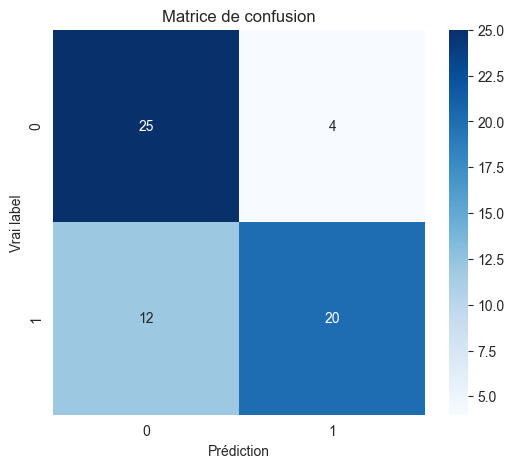

In [93]:
cm = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Prédiction")
plt.ylabel("Vrai label")
plt.title("Matrice de confusion")
plt.show()


Accuracy globale: 0.738


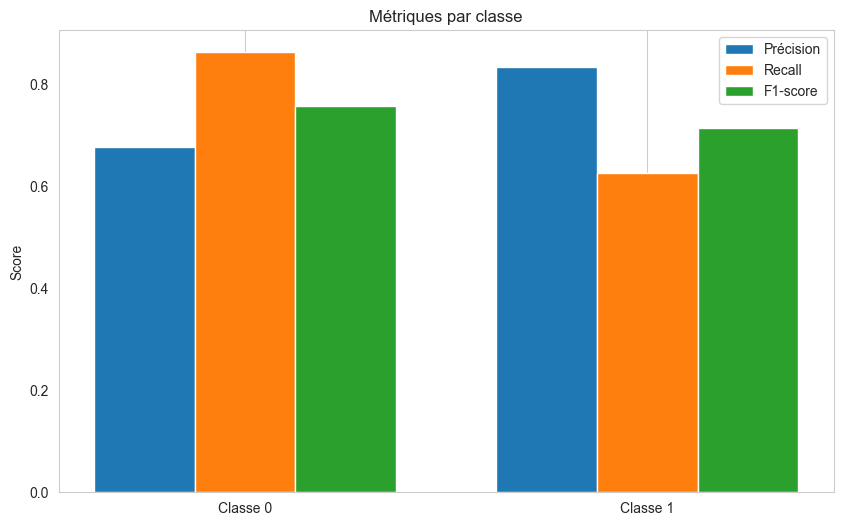

In [94]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
# Calcul des métriques par classe
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred_knn)

# Accuracy globale
accuracy = accuracy_score(y_test, y_pred_knn)

print(f"Accuracy globale: {accuracy:.3f}")

# Affichage sous forme de graphique
labels = [f'Classe {i}' for i in range(len(precision))]

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width, precision, width, label='Précision')
ax.bar(x, recall, width, label='Recall')
ax.bar(x + width, f1, width, label='F1-score')

ax.set_ylabel('Score')
ax.set_title('Métriques par classe')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(axis='y')

plt.show()

Le modèle indique une mauvaise reconnaissance des classes minoritaires. 

### Optimisation des hyperparamètres

Meilleurs paramètres : {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 5}
Meilleur score CV : 0.7892006802721088


,precision,recall,f1-score,support
0,0.67,0.90,0.76,29.00
1,0.86,0.59,0.70,32.00
accuracy,0.74,0.74,0.74,0.74
macro avg,0.77,0.75,0.73,61.00
weighted avg,0.77,0.74,0.73,61.00


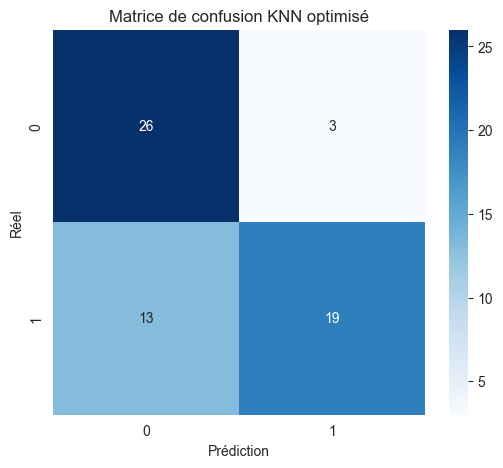

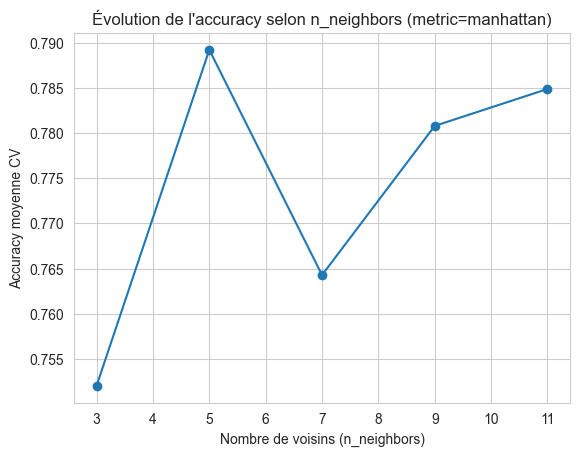

In [95]:
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

param_grid = {
    'classifier__n_neighbors': [3, 5, 7, 9, 11],
    'classifier__metric': ['euclidean', 'manhattan']
}

# GridSearchCV avec 5-fold cross-validation
grid_search_knn = GridSearchCV(pipeline_knn, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search_knn.fit(X_train, y_train)

# Résultats
print("Meilleurs paramètres :", grid_search_knn.best_params_)
print("Meilleur score CV :", grid_search_knn.best_score_)

# Prédiction sur le test avec le meilleur modèle
y_pred = grid_search_knn.predict(X_test)

# Rapport de classification (converti en DataFrame pour affichage)
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
styled_report = report_df.style.background_gradient(cmap='Blues').format("{:.2f}")
display(styled_report)  # Utilise display() dans Jupyter Notebook / IPython

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prédiction')
plt.ylabel('Réel')
plt.title('Matrice de confusion KNN optimisé')
plt.show()

# Visualiser l'évolution de la précision en fonction de n_neighbors pour la meilleure metric
results = grid_search_knn.cv_results_
mean_test_scores = results['mean_test_score']
params = results['params']

# Extraction des scores pour la meilleure métrique uniquement
best_metric = grid_search_knn.best_params_['classifier__metric']
neighbors = []
scores = []
for param, score in zip(params, mean_test_scores):
    if param['classifier__metric'] == best_metric:
        neighbors.append(param['classifier__n_neighbors'])
        scores.append(score)

plt.plot(neighbors, scores, marker='o')
plt.xlabel('Nombre de voisins (n_neighbors)')
plt.ylabel('Accuracy moyenne CV')
plt.title(f"Évolution de l'accuracy selon n_neighbors (metric={best_metric})")
plt.grid(True)
plt.show()



Apres optimisation, le modèle de KNN a montré une baisse de l'accuracy et du F1-score, indiquant une dégradation des performances.

## **Random Forest Classifier**

In [96]:
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])
pipeline_rf

,steps,"[('scaler', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2


In [97]:
pipeline_rf.fit(X_train, y_train)
joblib.dump(pipeline_rf, '../Pipeline/pipeline_rf.pkl')


['../Pipeline/pipeline_rf.pkl']

In [98]:
y_pred_rf = pipeline_rf.predict(X_test)

In [99]:
report_dict = classification_report(y_test, y_pred_rf, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
report_df.style.background_gradient(cmap='Blues').format("{:.2f}")

,precision,recall,f1-score,support
0,0.68,0.86,0.76,29.00
1,0.83,0.62,0.71,32.00
accuracy,0.74,0.74,0.74,0.74
macro avg,0.75,0.74,0.74,61.00
weighted avg,0.76,0.74,0.73,61.00


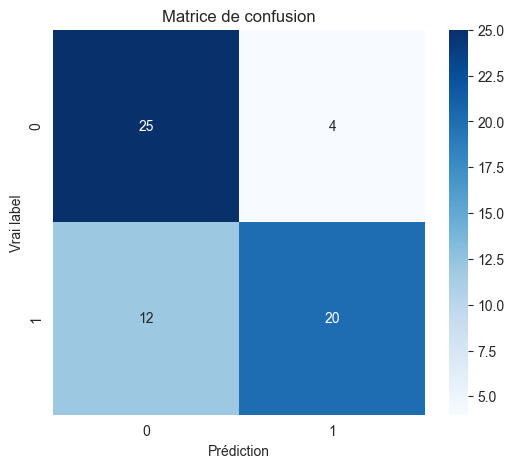

In [100]:
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Prédiction")
plt.ylabel("Vrai label")
plt.title("Matrice de confusion")
plt.show()


Accuracy globale: 0.738


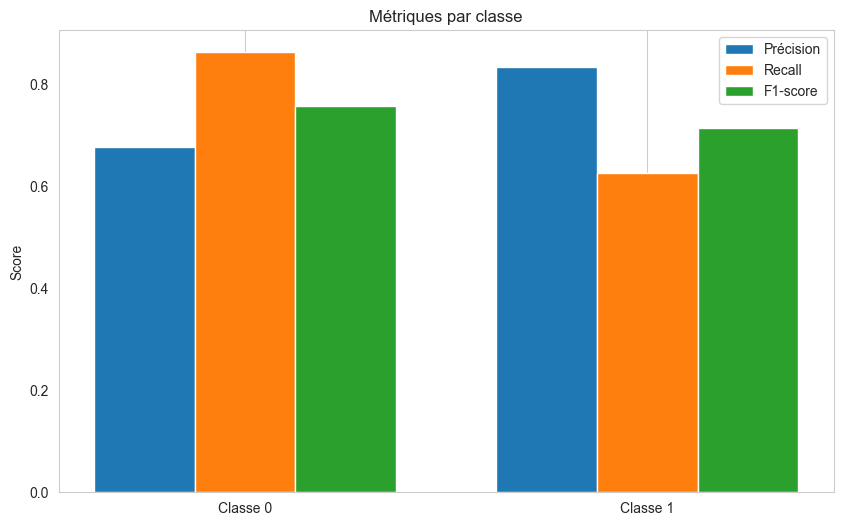

In [101]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
# Calcul des métriques par classe
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred_rf)

# Accuracy globale
accuracy = accuracy_score(y_test, y_pred_rf)

print(f"Accuracy globale: {accuracy:.3f}")

# Affichage sous forme de graphique
labels = [f'Classe {i}' for i in range(len(precision))]

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width, precision, width, label='Précision')
ax.bar(x, recall, width, label='Recall')
ax.bar(x + width, f1, width, label='F1-score')

ax.set_ylabel('Score')
ax.set_title('Métriques par classe')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(axis='y')

plt.show()

Ce modèle est moins performant que les précédents, avec une accuracy de 0.754  indiquant une mauvaise reconnaissance des classes minoritaires.

### Optimisation des hyperparamètres

In [102]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2],
    'classifier__max_features': ['sqrt', 'log2'],
    'classifier__bootstrap': [True, False]
}
grid_search_rf = GridSearchCV(
    pipeline_rf,
    param_grid,
    cv=5,
    scoring='accuracy',  # ou 'f1_weighted', 'roc_auc_ovr', etc.
    n_jobs=-1,
    verbose=1,
    return_train_score=True
)
grid_search_rf.fit(X_train, y_train)

print("Meilleurs paramètres :", grid_search_rf.best_params_)
print("Meilleure score CV :", grid_search_rf.best_score_)


Fitting 5 folds for each of 144 candidates, totalling 720 fits
Meilleurs paramètres : {'classifier__bootstrap': False, 'classifier__max_depth': None, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}
Meilleure score CV : 0.8060374149659865


,precision,recall,f1-score,support
0,0.68,0.86,0.76,29.00
1,0.83,0.62,0.71,32.00
accuracy,0.74,0.74,0.74,0.74
macro avg,0.75,0.74,0.74,61.00
weighted avg,0.76,0.74,0.73,61.00


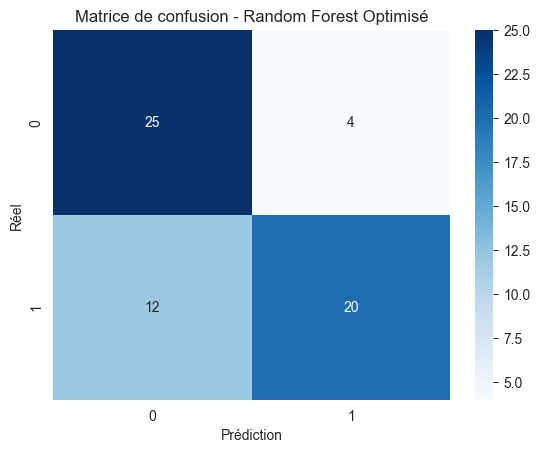

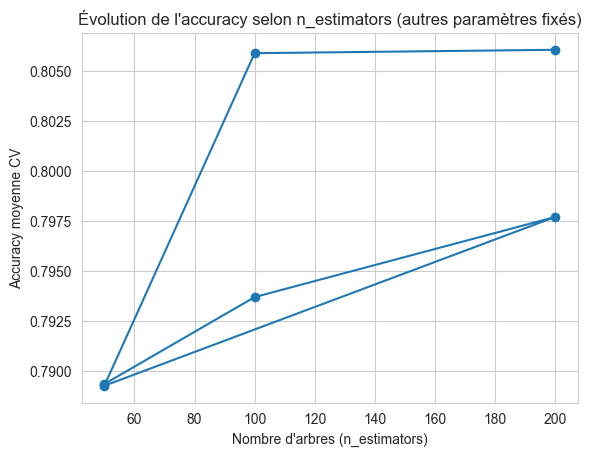

In [103]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = grid_search_rf.predict(X_test)
# Rapport de classification (converti en DataFrame pour affichage)
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
styled_report = report_df.style.background_gradient(cmap='Blues').format("{:.2f}")
display(styled_report)  # Utilise display() dans Jupyter Notebook / IPython

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion - Random Forest Optimisé")
plt.xlabel("Prédiction")
plt.ylabel("Réel")
plt.show()

# 📊 Visualisation de l'accuracy moyenne selon n_estimators (toutes autres conditions égales)
results = grid_search_rf.cv_results_
n_estimators = []
mean_test_scores = []

for i, params in enumerate(results['params']):
    if (params['classifier__max_depth'] == grid_search_rf.best_params_['classifier__max_depth'] and
        params['classifier__min_samples_split'] == grid_search_rf.best_params_['classifier__min_samples_split'] and
        params['classifier__min_samples_leaf'] == grid_search_rf.best_params_['classifier__min_samples_leaf'] and
        params['classifier__max_features'] == grid_search_rf.best_params_['classifier__max_features']):
        n_estimators.append(params['classifier__n_estimators'])
        mean_test_scores.append(results['mean_test_score'][i])

plt.plot(n_estimators, mean_test_scores, marker='o')
plt.xlabel('Nombre d\'arbres (n_estimators)')
plt.ylabel('Accuracy moyenne CV')
plt.title("Évolution de l'accuracy selon n_estimators (autres paramètres fixés)")
plt.grid(True)
plt.show()

## **XGboost classification** 


In [104]:
# Pipeline avec XGBoost
pipeline_xgb = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
])

pipeline_xgb

,steps,"[('scaler', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None


In [105]:
pipeline_xgb.fit(X_train, y_train)
joblib.dump(pipeline_xgb, '../Pipeline/pipeline_xgb.pkl')



c:\Users\user\OneDrive\Desktop\ENSAE\Semestre 2\IML2\Projet\Machine-Learning\env\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:05:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


['../Pipeline/pipeline_xgb.pkl']

In [106]:
y_pred_xgb = pipeline_xgb.predict(X_test)
report_dict = classification_report(y_test, y_pred_xgb, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
report_df.style.background_gradient(cmap='Blues').format("{:.2f}")

,precision,recall,f1-score,support
0,0.68,0.86,0.76,29.00
1,0.83,0.62,0.71,32.00
accuracy,0.74,0.74,0.74,0.74
macro avg,0.75,0.74,0.74,61.00
weighted avg,0.76,0.74,0.73,61.00


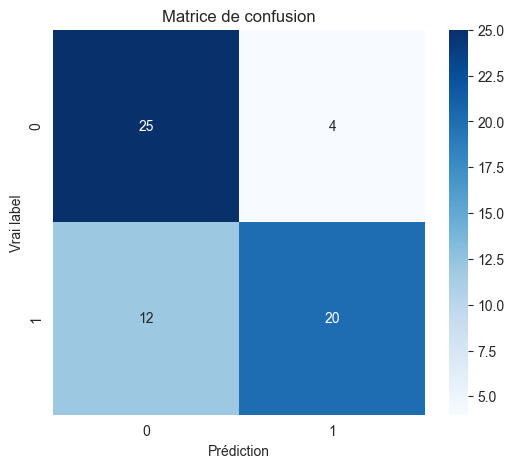

In [107]:
cm = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Prédiction")
plt.ylabel("Vrai label")
plt.title("Matrice de confusion")
plt.show()


Accuracy globale: 0.738


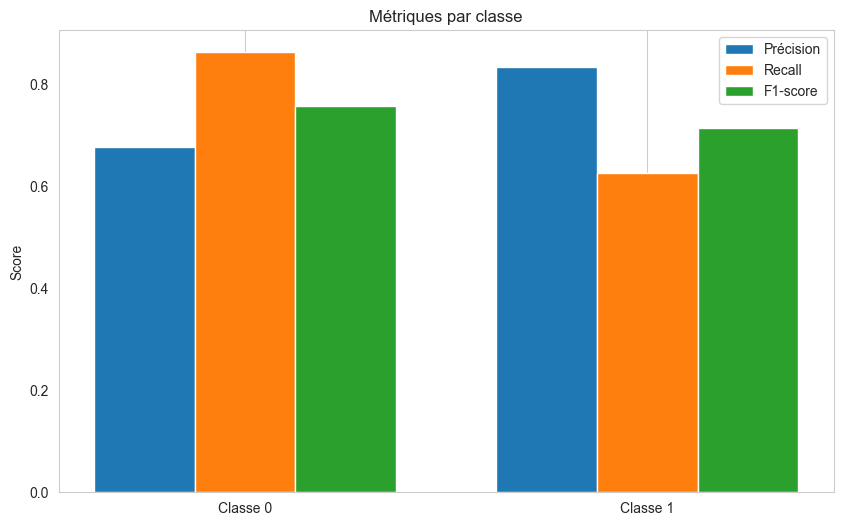

In [108]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
# Calcul des métriques par classe
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred_xgb)

# Accuracy globale
accuracy = accuracy_score(y_test, y_pred_xgb)

print(f"Accuracy globale: {accuracy:.3f}")

# Affichage sous forme de graphique
labels = [f'Classe {i}' for i in range(len(precision))]

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width, precision, width, label='Précision')
ax.bar(x, recall, width, label='Recall')
ax.bar(x + width, f1, width, label='F1-score')

ax.set_ylabel('Score')
ax.set_title('Métriques par classe')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(axis='y')

plt.show()

Le XGboost n'a pas de bonne performance, avec une accuracy de 0.525 indiquant une mauvaise reconnaissance de certaines classes.

### Optimisation des hyperparamètres

Fitting 5 folds for each of 8 candidates, totalling 40 fits


c:\Users\user\OneDrive\Desktop\ENSAE\Semestre 2\IML2\Projet\Machine-Learning\env\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:05:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


 Accuracy après optimisation : 0.70


,precision,recall,f1-score,support
0,0.64,0.86,0.74,29.00
1,0.82,0.56,0.67,32.00
accuracy,0.70,0.70,0.70,0.70
macro avg,0.73,0.71,0.70,61.00
weighted avg,0.73,0.70,0.70,61.00


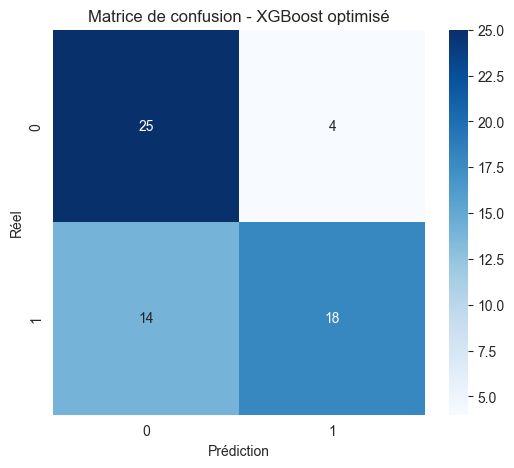

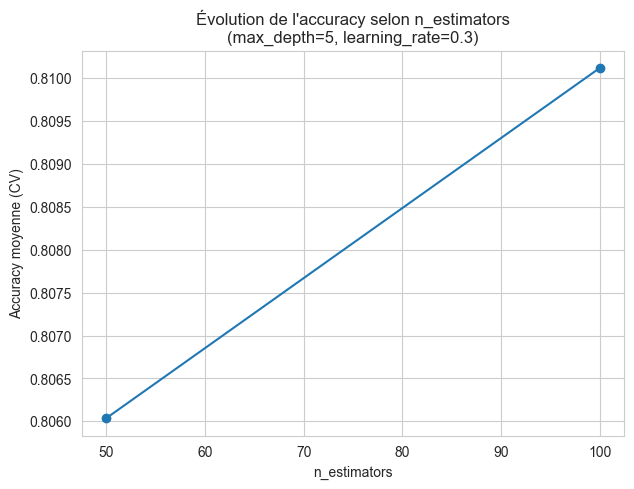

In [109]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Pipeline XGBoost
pipeline_xgb = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
])

# Grille d'hyperparamètres
param_grid = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [3, 5],
    'classifier__learning_rate': [0.1, 0.3]
}

# GridSearchCV
grid_search_xgb = GridSearchCV(
    pipeline_xgb, param_grid,
    cv=5, scoring='accuracy',
    n_jobs=-1, verbose=1, return_train_score=True
)
grid_search_xgb.fit(X_train, y_train)

# Prédiction
y_pred = grid_search_xgb.predict(X_test)

# Calcul de l'accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f" Accuracy après optimisation : {accuracy:.2f}")

# Rapport de classification
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
display(report_df.style.background_gradient(cmap='Blues').format("{:.2f}"))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prédiction')
plt.ylabel('Réel')
plt.title('Matrice de confusion - XGBoost optimisé')
plt.show()
# Récupérer les résultats du GridSearch
results = grid_search_xgb.cv_results_

# Extraire les scores et n_estimators pour la meilleure combinaison de max_depth et learning_rate
best_depth = grid_search_xgb.best_params_['classifier__max_depth']
best_lr = grid_search_xgb.best_params_['classifier__learning_rate']

n_estimators = []
mean_scores = []

for param, score in zip(results['params'], results['mean_test_score']):
    if (param['classifier__max_depth'] == best_depth and
        param['classifier__learning_rate'] == best_lr):
        n_estimators.append(param['classifier__n_estimators'])
        mean_scores.append(score)

# Tracer la courbe
plt.figure(figsize=(7, 5))
plt.plot(n_estimators, mean_scores, marker='o')
plt.title(f"Évolution de l'accuracy selon n_estimators\n(max_depth={best_depth}, learning_rate={best_lr})")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy moyenne (CV)")
plt.grid(True)
plt.show()


Après  optimisation le modèle presente de meilleures performances qu'avant mais reste toujours inferieur aux modèles de régression logistique et KNN.

## **Naive Bayes**

In [110]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Pipeline Naive Bayes
pipeline_nb = Pipeline([
    ('scaler', StandardScaler()),  # standardisation
    ('classifier', GaussianNB())   # modèle
])
pipeline_nb

,steps,"[('scaler', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,priors,None
,var_smoothing,1e-09


In [111]:
# Entraînement
pipeline_nb.fit(X_train, y_train)
joblib.dump(pipeline_nb, '../Pipeline/pipeline_nb.pkl')


['../Pipeline/pipeline_nb.pkl']

✅ Accuracy Naive Bayes : 0.72


,precision,recall,f1-score,support
0,0.66,0.86,0.75,29.00
1,0.83,0.59,0.69,32.00
accuracy,0.72,0.72,0.72,0.72
macro avg,0.74,0.73,0.72,61.00
weighted avg,0.75,0.72,0.72,61.00


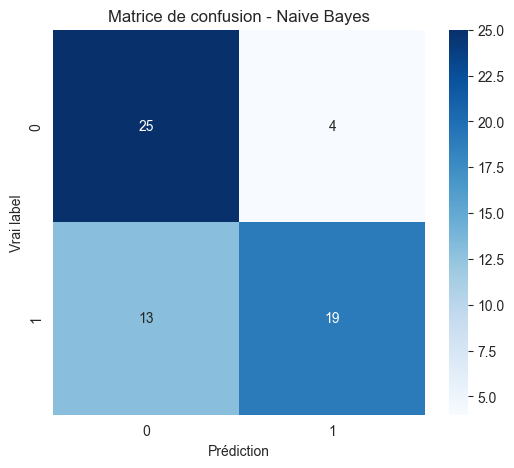

In [112]:
y_pred_nvb = pipeline_nb.predict(X_test)
# Accuracy
accuracy = accuracy_score(y_test, y_pred_nvb)
print(f"✅ Accuracy Naive Bayes : {accuracy:.2f}")
# Rapport de classification
report = classification_report(y_test, y_pred_nvb, output_dict=True)
report_df = pd.DataFrame(report).transpose()
display(report_df.style.background_gradient(cmap='Blues').format("{:.2f}"))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred_nvb)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Prédiction")
plt.ylabel("Vrai label")
plt.title("Matrice de confusion - Naive Bayes")
plt.show()


Accuracy globale: 0.721


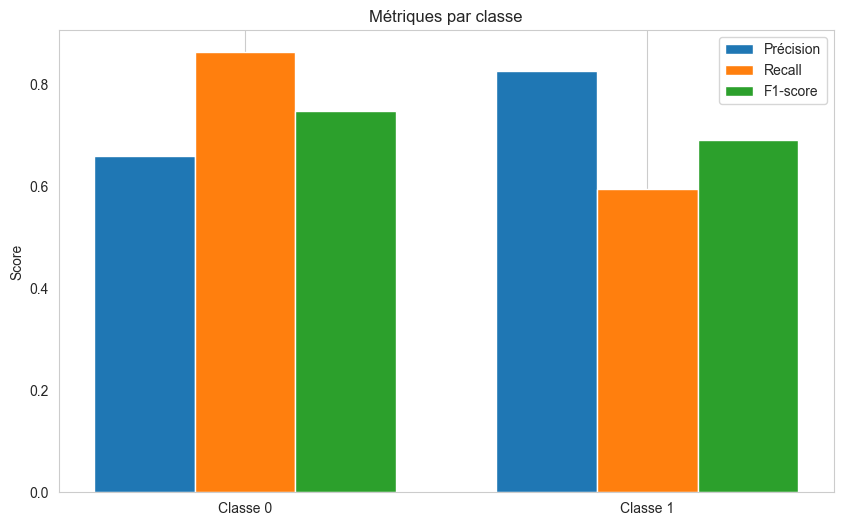

In [113]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
# Calcul des métriques par classe
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred_nvb)

# Accuracy globale
accuracy = accuracy_score(y_test, y_pred_nvb)

print(f"Accuracy globale: {accuracy:.3f}")

# Affichage sous forme de graphique
labels = [f'Classe {i}' for i in range(len(precision))]

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width, precision, width, label='Précision')
ax.bar(x, recall, width, label='Recall')
ax.bar(x + width, f1, width, label='F1-score')

ax.set_ylabel('Score')
ax.set_title('Métriques par classe')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(axis='y')

plt.show()

### Optimisation des hyperparamètres

 Meilleurs paramètres : {'classifier__var_smoothing': 1e-09}
 Meilleure accuracy CV :,0.81
 Accuracy test après optimisation : 0.72


,precision,recall,f1-score,support
0,0.66,0.86,0.75,29.00
1,0.83,0.59,0.69,32.00
accuracy,0.72,0.72,0.72,0.72
macro avg,0.74,0.73,0.72,61.00
weighted avg,0.75,0.72,0.72,61.00


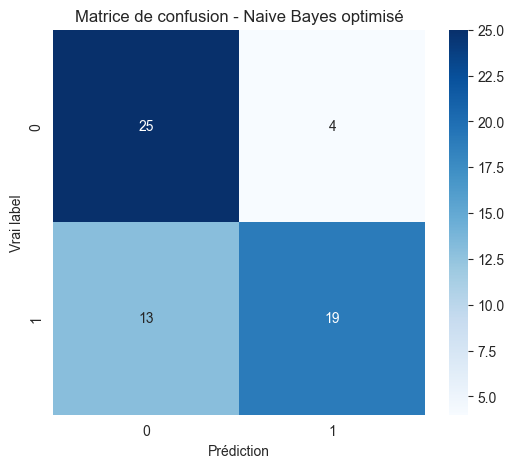

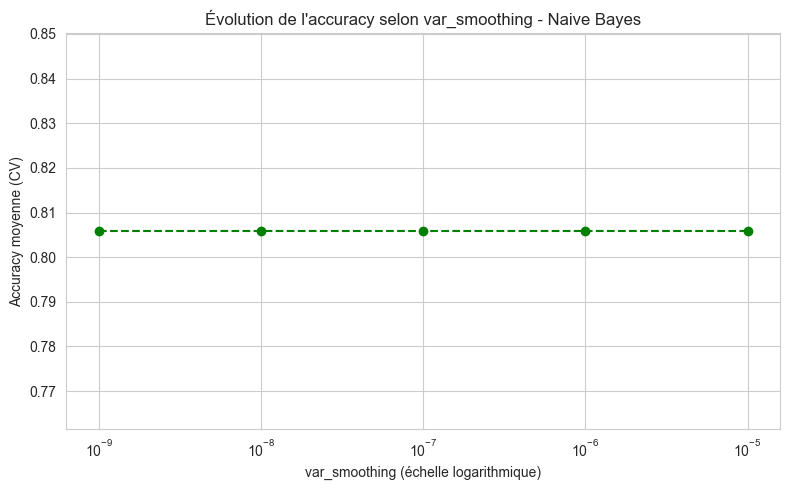

In [114]:
# Grille d'hyperparamètres : var_smoothing
param_grid = {
    'classifier__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# GridSearchCV
grid_search_nb = GridSearchCV(pipeline_nb, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search_nb.fit(X_train, y_train)

# Meilleurs paramètres et score
print(" Meilleurs paramètres :", grid_search_nb.best_params_)
print(f" Meilleure accuracy CV :,{grid_search_nb.best_score_:.2f}")

# Prédiction sur test set
y_pred = grid_search_nb.predict(X_test)

# Accuracy test
accuracy = accuracy_score(y_test, y_pred)
print(f" Accuracy test après optimisation : {accuracy:.2f}")

# Rapport de classification
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Affichage des métriques
display(report_df.style.background_gradient(cmap='Blues').format("{:.2f}"))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Prédiction")
plt.ylabel("Vrai label")
plt.title("Matrice de confusion - Naive Bayes optimisé")
plt.show()

#  Représentation graphique : évolution de l'accuracy
results = grid_search_nb.cv_results_
smoothing_values = [param['classifier__var_smoothing'] for param in results['params']]
mean_test_scores = results['mean_test_score']

plt.figure(figsize=(8, 5))
plt.plot(smoothing_values, mean_test_scores, marker='o', linestyle='--', color='green')
plt.xscale('log')
plt.xlabel('var_smoothing (échelle logarithmique)')
plt.ylabel('Accuracy moyenne (CV)')
plt.title("Évolution de l'accuracy selon var_smoothing - Naive Bayes")
plt.grid(True)
plt.tight_layout()
plt.show()

Après optimisation le modèle presente de faible perfermances que lorsque'elle n'est pas optimisée.

## **Decision Tree**

In [115]:
# 1. Pipeline
pipeline_dt = Pipeline([
    ('scaler', StandardScaler()),  # facultatif pour DecisionTree, mais gardé pour cohérence
    ('classifier', DecisionTreeClassifier(random_state=42))
])

pipeline_dt


,steps,"[('scaler', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2


In [116]:
pipeline_dt.fit(X_train, y_train)
joblib.dump(pipeline_dt, '../Pipeline/pipeline_dt.pkl')

['../Pipeline/pipeline_dt.pkl']

 Decision Tree (non optimisé) - Accuracy : 0.77


,precision,recall,f1-score,support
0,0.73,0.83,0.77,29.00
1,0.82,0.72,0.77,32.00
accuracy,0.77,0.77,0.77,0.77
macro avg,0.77,0.77,0.77,61.00
weighted avg,0.78,0.77,0.77,61.00


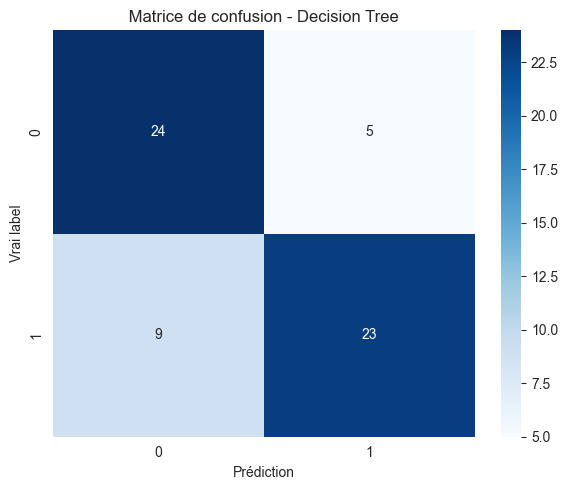

In [117]:
y_pred_dt = pipeline_dt.predict(X_test)
# Accuracy
accuracy = accuracy_score(y_test, y_pred_dt)
print(f" Decision Tree (non optimisé) - Accuracy : {accuracy:.2f}")

# Rapport de classification
report_dict = classification_report(y_test, y_pred_dt, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
display(report_df.style.background_gradient(cmap='Blues').format("{:.2f}"))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Prédiction")
plt.ylabel("Vrai label")
plt.title(" Matrice de confusion - Decision Tree ")
plt.tight_layout()
plt.show()


Accuracy globale: 0.770


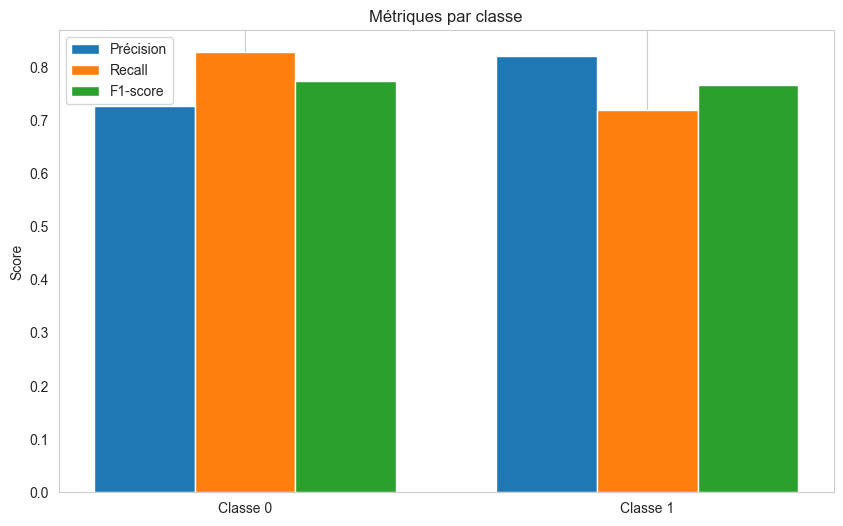

In [118]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
# Calcul des métriques par classe
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred_dt)

# Accuracy globale
accuracy = accuracy_score(y_test, y_pred_dt)

print(f"Accuracy globale: {accuracy:.3f}")

# Affichage sous forme de graphique
labels = [f'Classe {i}' for i in range(len(precision))]

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width, precision, width, label='Précision')
ax.bar(x, recall, width, label='Recall')
ax.bar(x + width, f1, width, label='F1-score')

ax.set_ylabel('Score')
ax.set_title('Métriques par classe')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(axis='y')

plt.show()

Le decision tree est de loin le moins performant des modèles testés indiquant une très mauvaise reconnaissance des classes minoritaires.

### Optimisation des hyperparamètres

Meilleurs hyperparamètres : {'classifier__criterion': 'entropy', 'classifier__max_depth': 5, 'classifier__min_samples_split': 10}
Meilleure accuracy CV : 0.79
Accuracy sur test : 0.74


,precision,recall,f1-score,support
0,0.71,0.76,0.73,29.00
1,0.77,0.72,0.74,32.00
accuracy,0.74,0.74,0.74,0.74
macro avg,0.74,0.74,0.74,61.00
weighted avg,0.74,0.74,0.74,61.00


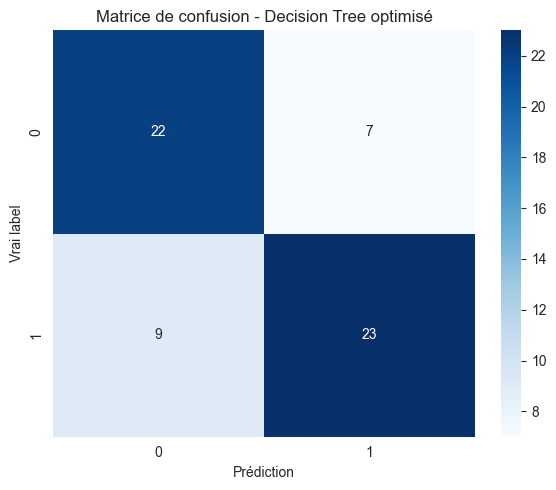

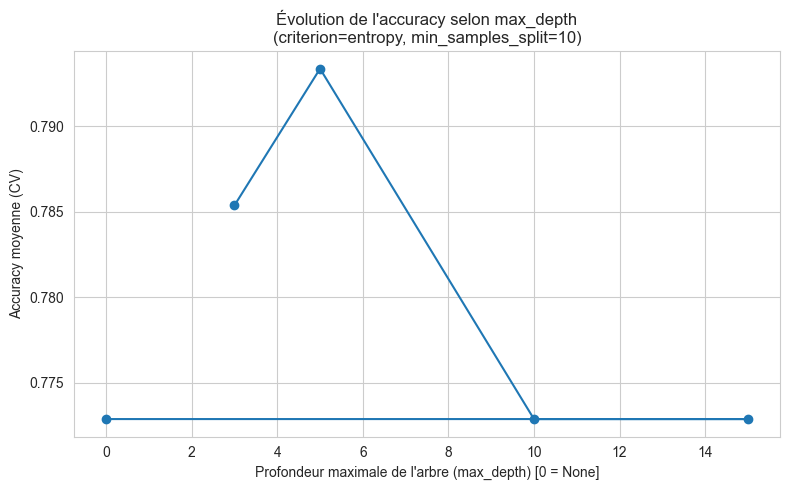

In [119]:
# Grille d'hyperparamètres
param_grid_dt = {
    'classifier__max_depth': [3, 5, 10, 15, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__criterion': ['gini', 'entropy']
}

# GridSearchCV
grid_search_dt = GridSearchCV(pipeline_dt, param_grid_dt, cv=5, scoring='accuracy', return_train_score=True)
grid_search_dt.fit(X_train, y_train)

# Meilleurs paramètres
print("Meilleurs hyperparamètres :", grid_search_dt.best_params_)
print(f"Meilleure accuracy CV : {grid_search_dt.best_score_:.2f}")

# Prédiction avec le meilleur modèle
y_pred = grid_search_dt.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy sur test : {accuracy:.2f}")

# Rapport de classification
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
display(report_df.style.background_gradient(cmap='Blues').format("{:.2f}"))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Prédiction")
plt.ylabel("Vrai label")
plt.title("Matrice de confusion - Decision Tree optimisé")
plt.tight_layout()
plt.show()

# Extraire les résultats du GridSearchCV
results = grid_search_dt.cv_results_
params = results['params']
mean_test_scores = results['mean_test_score']

# Extraire la meilleure combinaison de criterion et min_samples_split
best_criterion = grid_search_dt.best_params_['classifier__criterion']
best_min_split = grid_search_dt.best_params_['classifier__min_samples_split']

# Filtrer uniquement les combinaisons ayant ces deux meilleurs paramètres
depths = []
scores = []
for p, s in zip(params, mean_test_scores):
    if (p['classifier__criterion'] == best_criterion) and (p['classifier__min_samples_split'] == best_min_split):
        if p['classifier__max_depth'] is None:
            depths.append(0)  # Pour visualiser None (illimité)
        else:
            depths.append(p['classifier__max_depth'])
        scores.append(s)

# Affichage
plt.figure(figsize=(8,5))
plt.plot(depths, scores, marker='o')
plt.xlabel("Profondeur maximale de l'arbre (max_depth) [0 = None]")
plt.ylabel("Accuracy moyenne (CV)")
plt.title(f"Évolution de l'accuracy selon max_depth\n(criterion={best_criterion}, min_samples_split={best_min_split})")
plt.grid(True)
plt.tight_layout()
plt.show()


après optimisation le modèle presente de meilleures performances qu'avant mais reste toujours inferieur aux modèles précédents.

## **Support Vector Machine (SVM) classification**

In [120]:
#
from sklearn import svm
pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', svm.SVC(kernel='linear', probability=True))
])
pipeline_svm


,steps,"[('scaler', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'


In [121]:
pipeline_svm.fit(X_train, y_train)
joblib.dump(pipeline_svm, '../Pipeline/pipeline_svm.pkl')

['../Pipeline/pipeline_svm.pkl']

In [122]:
y_pred_svc = pipeline_dt.predict(X_test)
report_dict = classification_report(y_test, y_pred_svc, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
report_df.style.background_gradient(cmap='Blues').format("{:.2f}")


,precision,recall,f1-score,support
0,0.73,0.83,0.77,29.00
1,0.82,0.72,0.77,32.00
accuracy,0.77,0.77,0.77,0.77
macro avg,0.77,0.77,0.77,61.00
weighted avg,0.78,0.77,0.77,61.00


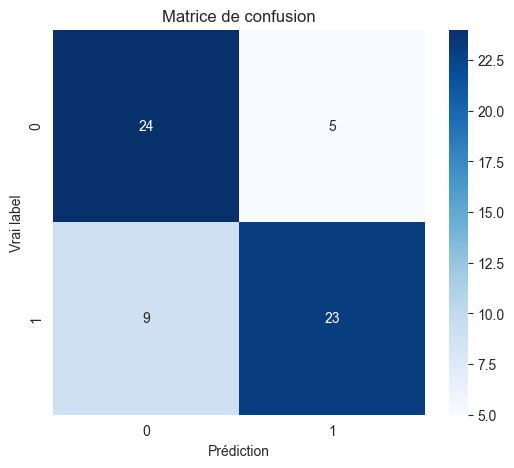

In [123]:
cm = confusion_matrix(y_test, y_pred_svc)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Prédiction")
plt.ylabel("Vrai label")
plt.title("Matrice de confusion")
plt.show()

Accuracy globale: 0.770


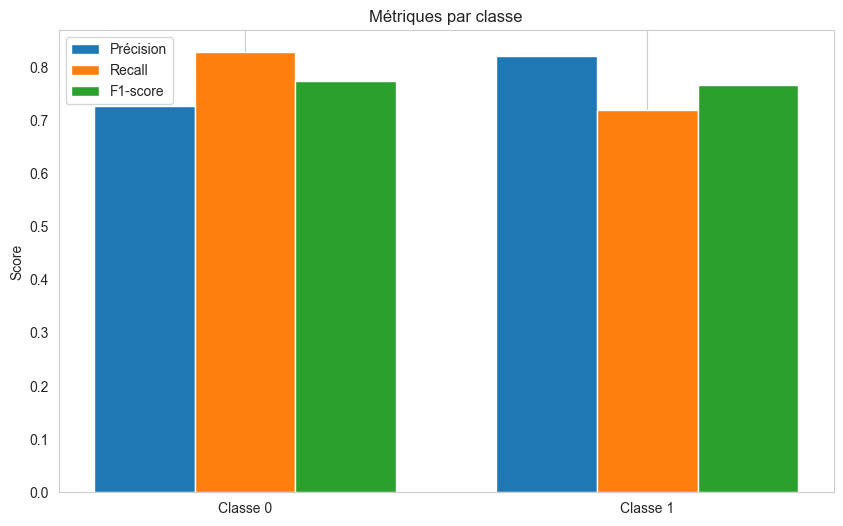

In [124]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
# Calcul des métriques par classe
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred_svc)

# Accuracy globale
accuracy = accuracy_score(y_test, y_pred_svc)

print(f"Accuracy globale: {accuracy:.3f}")

# Affichage sous forme de graphique
labels = [f'Classe {i}' for i in range(len(precision))]

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width, precision, width, label='Précision')
ax.bar(x, recall, width, label='Recall')
ax.bar(x + width, f1, width, label='F1-score')

ax.set_ylabel('Score')
ax.set_title('Métriques par classe')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(axis='y')

plt.show()

le SVM presente de loin le plus faible score de tous les modèles testés indiquant une très mauvaise reconnaissance des classes minoritaires.

### Optimisation des hyperparamètres

Meilleurs paramètres : {'classifier__C': 0.01, 'classifier__gamma': 'scale', 'classifier__kernel': 'linear'}
Meilleur score CV : 0.818
Accuracy sur le test set : 0.738


,precision,recall,f1-score,support
0,0.67,0.90,0.76,29.00
1,0.86,0.59,0.70,32.00
accuracy,0.74,0.74,0.74,0.74
macro avg,0.77,0.75,0.73,61.00
weighted avg,0.77,0.74,0.73,61.00


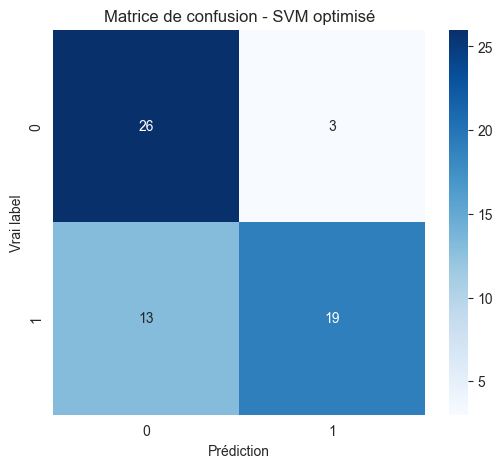

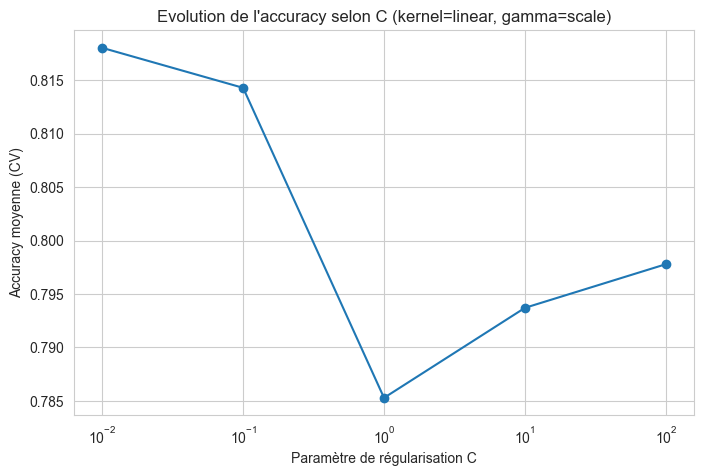

In [125]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Grille des hyperparamètres à tester
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__kernel': ['linear', 'rbf'],
    'classifier__gamma': ['scale', 'auto']
}

# GridSearchCV
grid_search_svm = GridSearchCV(pipeline_svm, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search_svm.fit(X_train, y_train)

# Affichage des meilleurs paramètres et meilleur score
print("Meilleurs paramètres :", grid_search_svm.best_params_)
print(f"Meilleur score CV : {grid_search_svm.best_score_:.3f}")

# Prédiction sur test set avec le meilleur modèle
y_pred = grid_search_svm.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy sur le test set : {accuracy:.3f}")

# Rapport de classification
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
display(report_df.style.background_gradient(cmap='Blues').format("{:.2f}"))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Prédiction")
plt.ylabel("Vrai label")
plt.title("Matrice de confusion - SVM optimisé")
plt.show()

# Visualisation de l'évolution de l'accuracy selon C (pour le meilleur kernel et gamma)
results = grid_search_svm.cv_results_
params = results['params']
mean_scores = results['mean_test_score']

best_kernel = grid_search_svm.best_params_['classifier__kernel']
best_gamma = grid_search_svm.best_params_['classifier__gamma']

C_values = []
scores = []

for p, s in zip(params, mean_scores):
    if (p['classifier__kernel'] == best_kernel) and (p['classifier__gamma'] == best_gamma):
        C_values.append(p['classifier__C'])
        scores.append(s)

plt.figure(figsize=(8,5))
plt.plot(C_values, scores, marker='o')
plt.xscale('log')
plt.xlabel("Paramètre de régularisation C")
plt.ylabel("Accuracy moyenne (CV)")
plt.title(f"Evolution de l'accuracy selon C (kernel={best_kernel}, gamma={best_gamma})")
plt.grid(True)
plt.show()

Nous avons optimisé le modèle SVM mais il reste  moins performant que certains des modèles testés

## **Neural Network**

In [126]:
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

pipeline_mlp = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', MLPClassifier(random_state=42, max_iter=500))
])

pipeline_mlp

,steps,"[('scaler', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,hidden_layer_sizes,"(100,)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001


In [127]:
pipeline_mlp.fit(X_train, y_train)
joblib.dump(pipeline_mlp, '../Pipeline/pipeline_mlp.pkl')

c:\Users\user\OneDrive\Desktop\ENSAE\Semestre 2\IML2\Projet\Machine-Learning\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


['../Pipeline/pipeline_mlp.pkl']

In [128]:
y_pred_mlp = pipeline_mlp.predict(X_test)
report_dict = classification_report(y_test, y_pred_mlp, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
report_df.style.background_gradient(cmap='Blues').format("{:.2f}")

,precision,recall,f1-score,support
0,0.69,0.86,0.77,29.00
1,0.84,0.66,0.74,32.00
accuracy,0.75,0.75,0.75,0.75
macro avg,0.77,0.76,0.75,61.00
weighted avg,0.77,0.75,0.75,61.00


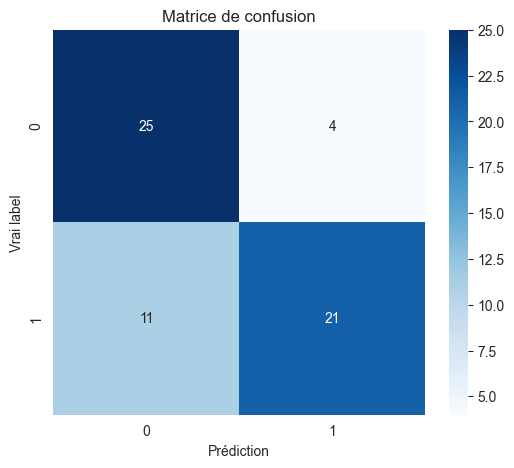

In [129]:
cm = confusion_matrix(y_test, y_pred_mlp)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Prédiction")
plt.ylabel("Vrai label")
plt.title("Matrice de confusion")
plt.show()

Accuracy globale: 0.754


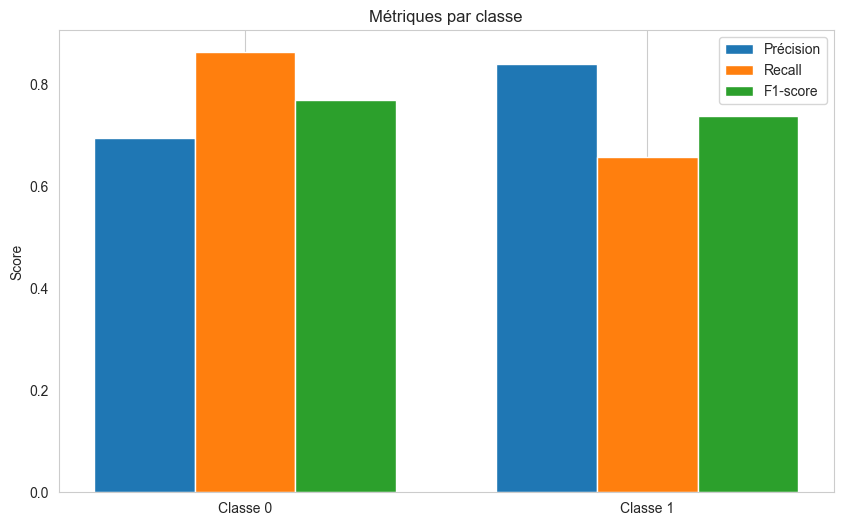

In [130]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
# Calcul des métriques par classe
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred_mlp)

# Accuracy globale
accuracy = accuracy_score(y_test, y_pred_mlp)

print(f"Accuracy globale: {accuracy:.3f}")

# Affichage sous forme de graphique
labels = [f'Classe {i}' for i in range(len(precision))]

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width, precision, width, label='Précision')
ax.bar(x, recall, width, label='Recall')
ax.bar(x + width, f1, width, label='F1-score')

ax.set_ylabel('Score')
ax.set_title('Métriques par classe')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(axis='y')

plt.show()

la mise en oeuvre d'un reseau de neurone n'a pas permis d'améliorer les performances du modèle en raison de la faible taille du jeu de données et de la complexité du modèle. donc il a donné de moindres performances que les modèles qui ont été testés premièrement.

### Optimisation des hyperparamètres

c:\Users\user\OneDrive\Desktop\ENSAE\Semestre 2\IML2\Projet\Machine-Learning\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\user\OneDrive\Desktop\ENSAE\Semestre 2\IML2\Projet\Machine-Learning\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\user\OneDrive\Desktop\ENSAE\Semestre 2\IML2\Projet\Machine-Learning\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\user\OneDrive\Desktop\ENSAE\Semestre 2\IML2\Projet\Machine-Learning\env\Lib\site-packages\sklearn\neural_network\_multilayer_pe

Meilleurs paramètres : {'classifier__activation': 'tanh', 'classifier__alpha': 0.01, 'classifier__hidden_layer_sizes': (50,), 'classifier__learning_rate_init': 0.001}
Meilleur score CV : 0.794
Accuracy sur test : 0.754


c:\Users\user\OneDrive\Desktop\ENSAE\Semestre 2\IML2\Projet\Machine-Learning\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


,precision,recall,f1-score,support
0,0.68,0.90,0.78,29.00
1,0.87,0.62,0.73,32.00
accuracy,0.75,0.75,0.75,0.75
macro avg,0.78,0.76,0.75,61.00
weighted avg,0.78,0.75,0.75,61.00


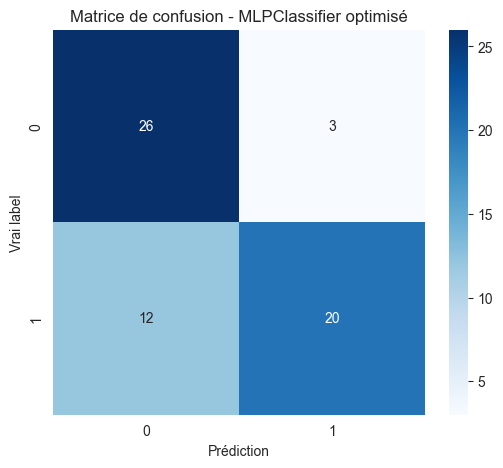

In [131]:
# Grille d'hyperparamètres pour l'optimisation
param_grid = {
    'classifier__hidden_layer_sizes': [(50,), (100,), (100, 50)],  # architecture réseau
    'classifier__activation': ['relu', 'tanh'],
    'classifier__alpha': [0.0001, 0.001, 0.01],  # régularisation L2
    'classifier__learning_rate_init': [0.001, 0.01]
}

# GridSearchCV pour optimisation hyperparamètres
grid_search_mlp = GridSearchCV(pipeline_mlp, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search_mlp.fit(X_train, y_train)

# Affichage des meilleurs paramètres et meilleur score CV
print("Meilleurs paramètres :", grid_search_mlp.best_params_)
print(f"Meilleur score CV : {grid_search_mlp.best_score_:.3f}")

# Prédiction sur le jeu test avec le meilleur modèle
y_pred = grid_search_mlp.predict(X_test)

# Accuracy sur test
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy sur test : {accuracy:.3f}")

# Rapport de classification
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
display(report_df.style.background_gradient(cmap='Blues').format("{:.2f}"))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Prédiction")
plt.ylabel("Vrai label")
plt.title("Matrice de confusion - MLPClassifier optimisé")
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_19716\2982404247.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hidden_layer_sizes', y='mean_test_score', data=df_visu, palette='viridis')


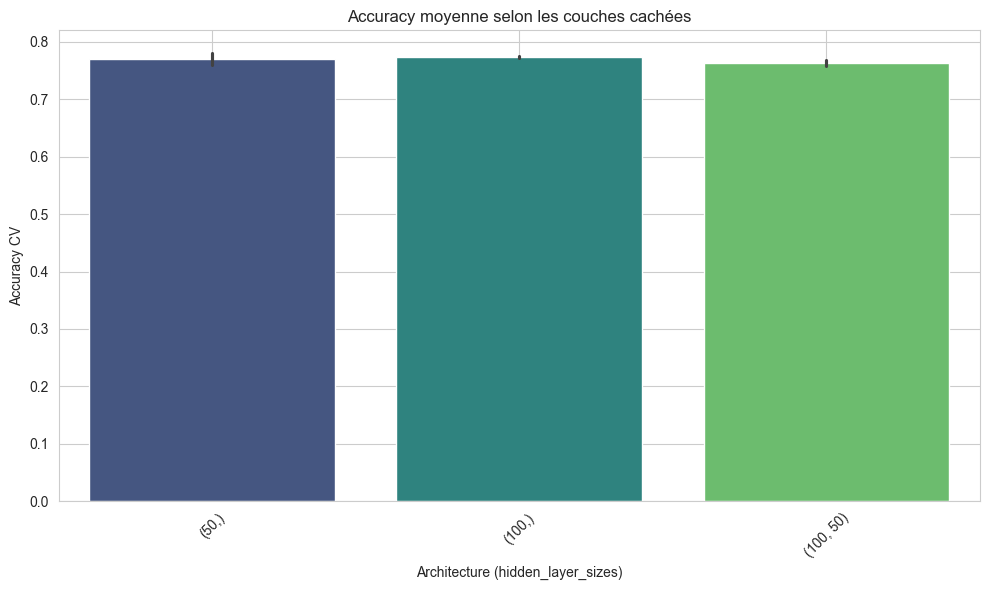

In [132]:
# Visualisation des scores par taille de couche
results = grid_search_mlp.cv_results_
hidden_layers = [str(param['classifier__hidden_layer_sizes']) for param in results['params']]
mean_test_scores = results['mean_test_score']

df_visu = pd.DataFrame({
    'hidden_layer_sizes': hidden_layers,
    'mean_test_score': mean_test_scores
})

plt.figure(figsize=(10,6))
sns.barplot(x='hidden_layer_sizes', y='mean_test_score', data=df_visu, palette='viridis')
plt.title("Accuracy moyenne selon les couches cachées")
plt.xlabel("Architecture (hidden_layer_sizes)")
plt.ylabel("Accuracy CV")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


## **Comparaison des modèles**

In [133]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Dictionnaire des prédictions par modèle (à adapter si tes variables ont d'autres noms)
model_predictions = {
    'Logistic Regression': y_pred_logreg,
    'KNN': y_pred_knn,
    'Random Forest': y_pred_rf,
    'XGBoost': y_pred_xgb,
    'Naive Bayes': y_pred_nvb,
    'Decision Tree': y_pred_dt,
    'SVM': y_pred_svc,
    'Neural Network': y_pred_mlp
}

# Construction du tableau récapitulatif
metrics_summary = []

for model_name, y_pred in model_predictions.items():
    metrics_summary.append({
        'Modèle': model_name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Précision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-score': f1_score(y_test, y_pred, average='weighted')
    })

# Affichage du DataFrame avec gradient de couleur
import pandas as pd

df_metrics = pd.DataFrame(metrics_summary).set_index('Modèle')
styled_df = df_metrics.style.background_gradient(cmap='Blues').format("{:.2f}")
styled_df


,Accuracy,Précision,Recall,F1-score
Modèle,,,,
Logistic Regression,0.77,0.79,0.77,0.77
KNN,0.74,0.76,0.74,0.73
Random Forest,0.74,0.76,0.74,0.73
XGBoost,0.74,0.76,0.74,0.73
Naive Bayes,0.72,0.75,0.72,0.72
Decision Tree,0.77,0.78,0.77,0.77
SVM,0.77,0.78,0.77,0.77
Neural Network,0.75,0.77,0.75,0.75


In [134]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Modèle → y_pred mapping
model_predictions = {
    'Logistic Regression': y_pred_logreg,
    'K-Nearest Neighbour': y_pred_knn,
    'Random Forest': y_pred_rf,
    'XGBoost': y_pred_xgb,
    'Naive Bayes': y_pred_nvb,
    'Decision Tree': y_pred_dt,
    'SVM': y_pred_svc,
    'Neural Network': y_pred_mlp
}

# Construire les métriques
metrics_summary = []
for model_name, y_pred in model_predictions.items():
    metrics_summary.append({
        'Modèle': model_name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Précision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-score': f1_score(y_test, y_pred, average='weighted')
    })

df_metrics = pd.DataFrame(metrics_summary).set_index('Modèle')

# Styling avancé
styled_df = (
    df_metrics
    .style
    .bar(subset=["Accuracy", "Précision", "Recall", "F1-score"], color='#1f77b4', vmin=0, vmax=1)
    .format("{:.2%}")
    .set_caption("Comparaison des performances des modèles de classification")
    .set_table_styles([
        {"selector": "caption", "props": [("font-size", "16px"), ("font-weight", "bold"), ("color", "#333")]}
    ])
)

# Affichage dans Jupyter
styled_df



,Accuracy,Précision,Recall,F1-score
Modèle,,,,
Logistic Regression,77.05%,79.31%,77.05%,76.80%
K-Nearest Neighbour,73.77%,75.84%,73.77%,73.49%
Random Forest,73.77%,75.84%,73.77%,73.49%
XGBoost,73.77%,75.84%,73.77%,73.49%
Naive Bayes,72.13%,74.61%,72.13%,71.72%
Decision Tree,77.05%,77.67%,77.05%,77.02%
SVM,77.05%,77.67%,77.05%,77.02%
Neural Network,75.41%,77.08%,75.41%,75.22%


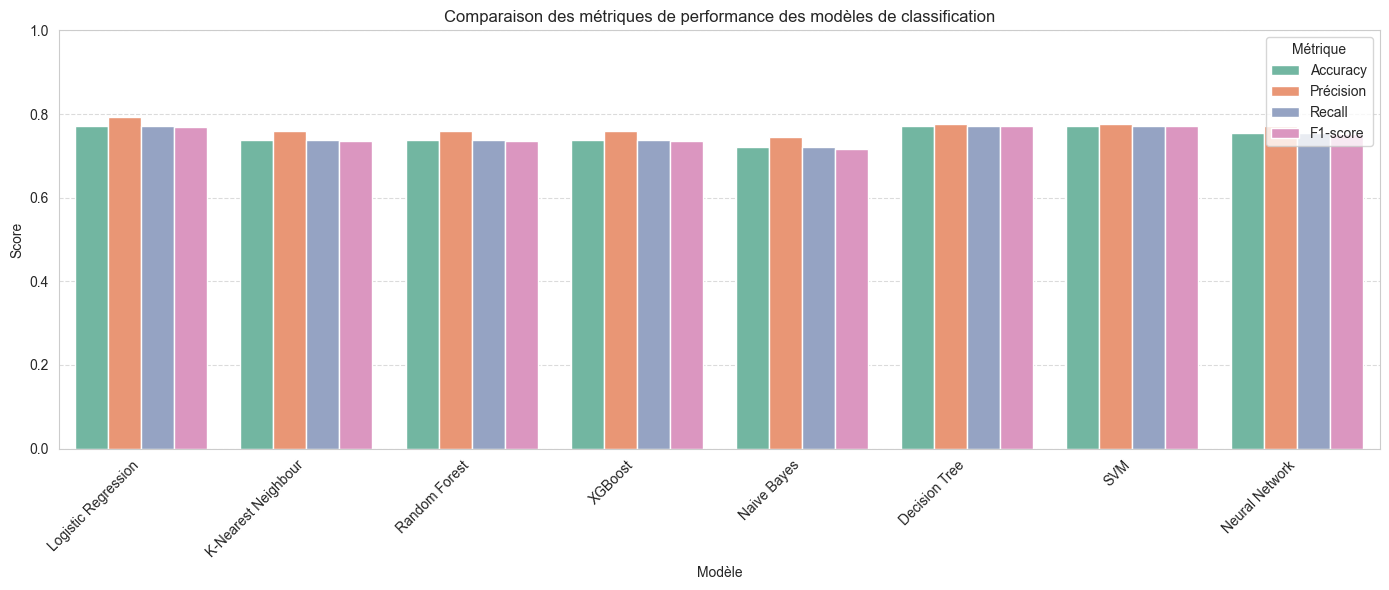

In [135]:

# Préparer les données pour seaborn (long format)
df_plot = df_metrics.reset_index().melt(
    id_vars='Modèle',
    var_name='Métrique',
    value_name='Score'
)

# Créer le graphique
plt.figure(figsize=(14, 6))
sns.barplot(data=df_plot, x='Modèle', y='Score', hue='Métrique', palette='Set2')

plt.title("Comparaison des métriques de performance des modèles de classification")
plt.ylabel("Score")
plt.xlabel("Modèle")
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.legend(title="Métrique", loc='upper right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Nous allons utiliser le recall pour comparer les modèles, car il est plus adapté aux classes déséquilibrées. en plus comme nous travaillons sur des données de santé, le recall est plus pertinent que la prise en compte de la précision..**


In [136]:
# Tri du DataFrame selon le Recall (du meilleur au moins bon)
df_metrics_sorted = df_metrics.sort_values(by='Recall', ascending=False)

styled_df_sorted = df_metrics_sorted.style.background_gradient(cmap='Oranges').format("{:.2f}")
styled_df_sorted

,Accuracy,Précision,Recall,F1-score
Modèle,,,,
Logistic Regression,0.77,0.79,0.77,0.77
Decision Tree,0.77,0.78,0.77,0.77
SVM,0.77,0.78,0.77,0.77
Neural Network,0.75,0.77,0.75,0.75
XGBoost,0.74,0.76,0.74,0.73
Random Forest,0.74,0.76,0.74,0.73
K-Nearest Neighbour,0.74,0.76,0.74,0.73
Naive Bayes,0.72,0.75,0.72,0.72


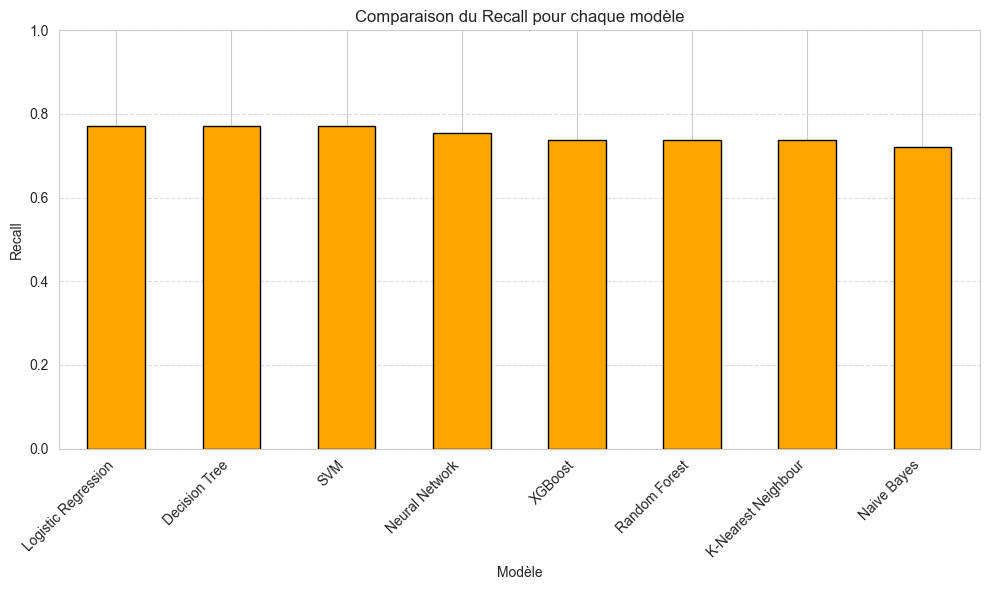

In [137]:
import matplotlib.pyplot as plt

# Bar plot du Recall
plt.figure(figsize=(10, 6))
df_metrics_sorted['Recall'].plot(kind='bar', color='orange', edgecolor='black')
plt.title("Comparaison du Recall pour chaque modèle")
plt.ylabel("Recall")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## **Nouvelle optimisation des hyperparamètres**


### **Optimisation des hyperparamètres du modèle de régression logistique**

In [138]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Pipeline : standardisation + régression logistique
pipeline_logreg = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42))
])

# Grille d'hyperparamètres
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],  # régularisation
    'classifier__penalty': ['l2']  # 'l1' possible avec solver='liblinear'
}
# valdation croisée avec GridSearchCV
grid_search_logreg = GridSearchCV(pipeline_logreg, param_grid, cv=5, scoring='recall_weighted', return_train_score=True)
grid_search_logreg.fit(X_train, y_train)

print("Meilleurs paramètres :", grid_search_logreg.best_params_)
print(f"Meilleur Recall (CV) : {grid_search_logreg.best_score_:.2f}")




c:\Users\user\OneDrive\Desktop\ENSAE\Semestre 2\IML2\Projet\Machine-Learning\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1254: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\user\OneDrive\Desktop\ENSAE\Semestre 2\IML2\Projet\Machine-Learning\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1254: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\user\OneDrive\Desktop\ENSAE\Semestre 2\IML2\Projet\Machine-Learning\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1254: FutureWarning: 'multi_c

Meilleurs paramètres : {'classifier__C': 0.1, 'classifier__penalty': 'l2'}
Meilleur Recall (CV) : 0.82


c:\Users\user\OneDrive\Desktop\ENSAE\Semestre 2\IML2\Projet\Machine-Learning\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1254: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\user\OneDrive\Desktop\ENSAE\Semestre 2\IML2\Projet\Machine-Learning\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1254: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\user\OneDrive\Desktop\ENSAE\Semestre 2\IML2\Projet\Machine-Learning\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1254: FutureWarning: 'multi_c

Nous obtenons **Meilleurs paramètres : {'classifier__C': 0.1, 'classifier__penalty': 'l2'}**
**Meilleur Recall (CV) : 0.59**

In [139]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# Prédictions sur les données de test
y_pred_logreg_opt = grid_search_logreg.predict(X_test)

# Rapport de classification
report = classification_report(y_test, y_pred_logreg_opt, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Affichage stylé des métriques
report_df_styled = report_df.style.background_gradient(cmap='Blues').format("{:.2f}")
display(report_df_styled)


,precision,recall,f1-score,support
0,0.70,0.90,0.79,29.00
1,0.88,0.66,0.75,32.00
accuracy,0.77,0.77,0.77,0.77
macro avg,0.79,0.78,0.77,61.00
weighted avg,0.79,0.77,0.77,61.00


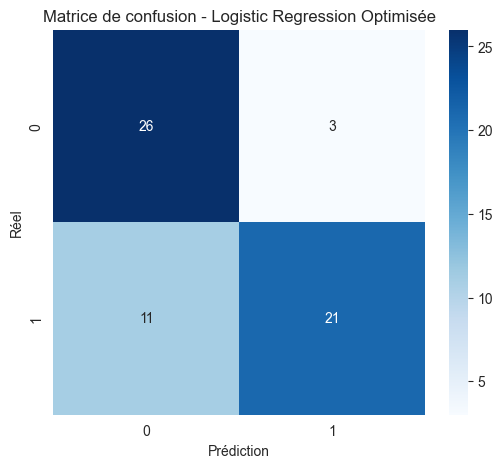

In [140]:
cm = confusion_matrix(y_test, y_pred_logreg_opt)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Prédiction")
plt.ylabel("Réel")
plt.title("Matrice de confusion - Logistic Regression Optimisée")
plt.show()


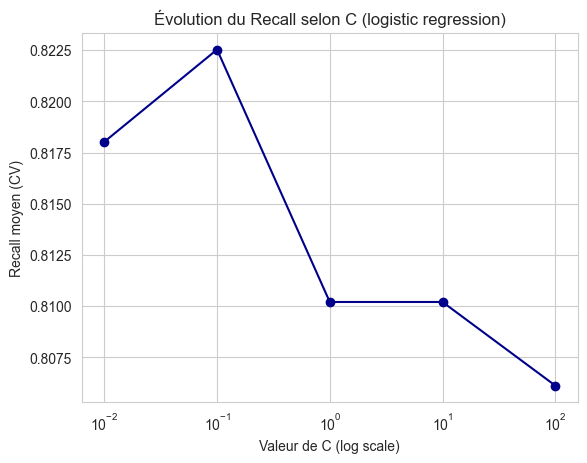

In [141]:
# Visualisation des scores moyens selon le paramètre C
import numpy as np

results = grid_search_logreg.cv_results_
C_values = [params['classifier__C'] for params in results['params']]
mean_scores = results['mean_test_score']

plt.plot(C_values, mean_scores, marker='o', color='darkblue')
plt.xscale('log')
plt.xlabel('Valeur de C (log scale)')
plt.ylabel('Recall moyen (CV)')
plt.title("Évolution du Recall selon C (logistic regression)")
plt.grid(True)
plt.show()


### **Finalement nous allons continuer avec le modèle de régression logistique**

## **Enregistrement du modèle**

In [142]:
import os

# Chemin du dossier
folder_path = '../models'

# Crée le dossier s'il n'existe pas
os.makedirs(folder_path, exist_ok=True)

# Ensuite, tu peux sauvegarder ton modèle
import joblib
joblib.dump(grid_search_logreg.best_estimator_, os.path.join(folder_path, 'logreg_model_optimise.joblib'))

# Chargement
model = joblib.load("../models/logreg_model_optimise.joblib")


In [143]:
import pandas as pd
import joblib

# Charger le modèle
model = joblib.load("../models/logreg_model_optimise.joblib")

# Ordre des colonnes d'entraînement sans la colonne cible 'num'
features = ['ca', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs','restecg', 'thalach', 'oldpeak' ]
           

# Exemple de nouvel individu (met les valeurs réelles ici)
new_patient_data = {
    'ca': 3,          # Nombre élevé de vaisseaux majeurs colorés (3 = très sévère)
    'age': 65,        # Âge avancé
    'sex': 1,         # Homme
    'cp': 0,          # Douleur thoracique typique (type 0 = angine typique)
    'trestbps': 170,  # Pression artérielle au repos très élevée
    'chol': 310,      # Taux de cholestérol élevé
    'fbs': 1,         # Glycémie à jeun > 120 mg/dl (diabète possible)
    'restecg': 2,     # Anomalie significative à l'ECG
    'thalach': 100,  # Fréquence cardiaque maximale faible (bradycardie relative)
    'oldpeak': 4.5
}

# Création du DataFrame dans le bon ordre
new_patient = pd.DataFrame([new_patient_data])[features]

# Prédiction
prediction = model.predict(new_patient)
print("Classification prédite :", prediction)


Classification prédite : [1]
